In [1]:
# IMF MCMCO Test Question 1

In [3]:
import ets_mod 

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Retrieve currency in circulation times series from the Bank of Zambia website.
z_url = 'https://www.boz.zm/FORTNIGHTLYTIMESERIESendingSeptember202024.xlsx'

df_raw = pd.read_excel(z_url, sheet_name='Reserve Money', skiprows=6)

In [6]:
# Data cleaning
circulation = df_raw.loc[:,"Circulation"].iloc[:2965]
date = df_raw.loc[:,"Unnamed: 1"].iloc[:2965]

df = pd.DataFrame({"date": date, "circulation": circulation})
df['date'] = pd.to_datetime(df['date']).dt.date

In [7]:
circulation = circulation.astype(float)

In [8]:
# Fitting Exponential Smoothing model
model = ets_mod.ETS_Model(circulation, trend="mul", seasonal="mul", seasonal_periods=7)

In [9]:
# Summary
model.summary()

                                 ETS Results                                  
Dep. Variable:            Circulation   No. Observations:                 2965
Model:                       ETS(AMM)   Log Likelihood              -37838.071
Date:                Fri, 17 Oct 2025   AIC                          75702.141
Time:                        10:00:06   BIC                          75780.072
Sample:                             0   HQIC                         75730.189
                               - 2965   Scale                   7113594126.682
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.021     47.994      0.000       0.959       1.041
smoothing_trend        0.4678      0.023     20.552      0.000       0.423       0.512
smoothing_seasonal  

AttributeError: 'ETSResults' object has no attribute 'phi'

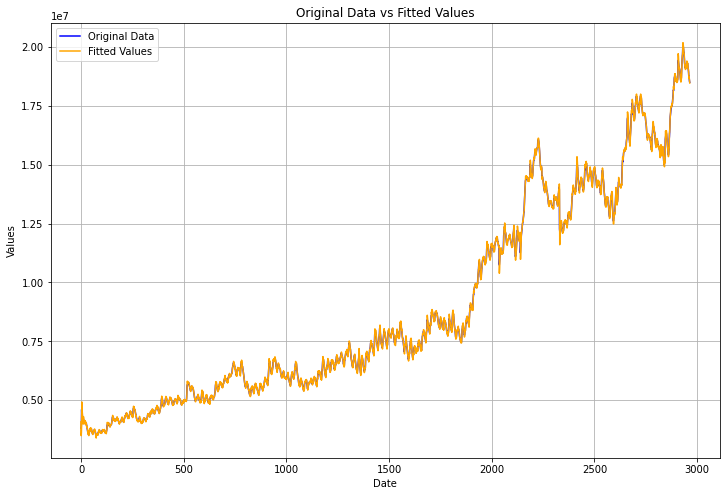

In [10]:
# Plot
model.plot()

In [11]:
# Forecast for the next week 7 days
es_forecast = model.forecast(days=7)

es_forecast = es_forecast.astype(int)

print(es_forecast)

2965    18422009
2966    18361510
2967    18280110
2968    18223477
2969    18164050
2970    18112083
2971    18060942
Name: simulation, dtype: int64


In [11]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

2024-10-27 19:20:02.928530: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
data = circulation 

In [13]:
# Parameters for the LSTM model
look_back = 30  

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))


In [14]:
# Creating sequences for LSTM
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i - look_back:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

# Reshaping input to be [samples, time steps, features] as required for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [15]:
# model construction

In [16]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
2935/2935 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0022
Epoch 2/10
2935/2935 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 3.6827e-04
Epoch 3/10
2935/2935 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 2.2101e-04
Epoch 4/10
2935/2935 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 1.3407e-04
Epoch 5/10
2935/2935 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 1.0260e-04
Epoch 6/10
2935/2935 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 1.3919e-04
Epoch 7/10
2935/2935 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 1.1094e-04
Epoch 8/10
2935/2935 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 7.4144e-05
Epoch 9/10
1065/2935 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 1.2574e-04

In [19]:
# Forecasting next 7 days

last_sequence = data_scaled[-look_back:]
forecast = []

for _ in range(7):
    pred = model.predict(last_sequence.reshape(1, look_back, 1))
    forecast.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred)

# Inverse scaling the forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

print("7-day forecast:", forecast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7-day forecast: [18576240. 18708606. 18858248. 19022270. 19195040. 19367860. 19531338.]
